# MTCNN을 이용한 얼굴 인식 실험

------------ 
참고문헌  
Selvam (n.d.) Face Detection Basics using MTCNN implementation https://handsondeeplearning.com/face-detection-basics-using-mtcnn-implementation/

# 기본 설정

In [1]:
# 코랩에서 한국어 프린트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
# 얼굴 인식 모듈 
!pip install mtcnn
from mtcnn.mtcnn import MTCNN
import os
import matplotlib.pyplot as plt

# 컴퓨터 비전 시각화 모듈
import cv2
from google.colab.patches import cv2_imshow

from google.colab import drive
from IPython.display import HTML, display

# 코랩 프린트 설정
def set_css():
  display(HTML('''<style>pre { white-space: pre-wrap; }</style>'''))
  
get_ipython().events.register('pre_run_cell', set_css)
drive.mount('here')

Drive already mounted at here; to attempt to forcibly remount, call drive.mount("here", force_remount=True).


## 1) 이미지 불러오기
이미지 폴더 안에 이미지 이외의 파일이 있는지 확인할 것. 

In [ ]:
ROOT_DIR = "/content/here/MyDrive/2021 Face Recognition/19062842/S001/L1/E01/"
extension = 'jpg'

files = os.listdir(ROOT_DIR)
file_list = [file_ for file_ in files if extension in file_]
image_name_list = []

# 이미지 데이터가 든 자료를 벡터화 한 (어레이)를 저장하는 [리스트]
face_arrays = []

# 이미지 불러오기 및 시험 출력
for image_file in file_list:
    image_name_list.append(image_file)
    print(ROOT_DIR + image_file)
    img = cv2.imread(ROOT_DIR + image_file)
    face_arrays.append(img)
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2_imshow(img)

# 어떤 이유로인지 해서 RGB - BGR 변환이 필요하지 않다...흠?

## 2) 얼굴 인식
- ```detect_faces()```

In [4]:
# mtcnn 모델 생성
mtcnn = MTCNN()

# mtcnn의 detect_faces가 추출하는 얼굴 인식 데이터 {딕셔너리}를 저장할 리스트 
face_dicts = []

# detect_faces 가 얼굴 특징 데이터를 검출
for face_array in (face_arrays):
  facial_features = mtcnn.detect_faces(face_array)
  face_dicts.append(facial_features)
  print(f'# of faces detected: {len(facial_features)}')
  print(facial_features)

# of faces detected: 0
[]
# of faces detected: 0
[]
# of faces detected: 1
[{'box': [128, 63, 73, 101], 'confidence': 0.9870308041572571, 'keypoints': {'left_eye': (153, 101), 'right_eye': (188, 101), 'nose': (174, 122), 'mouth_left': (157, 142), 'mouth_right': (183, 142)}}]
# of faces detected: 1
[{'box': [144, 58, 71, 97], 'confidence': 0.9519384503364563, 'keypoints': {'left_eye': (159, 99), 'right_eye': (193, 103), 'nose': (173, 124), 'mouth_left': (160, 136), 'mouth_right': (187, 138)}}]
# of faces detected: 0
[]
# of faces detected: 1
[{'box': [142, 59, 79, 113], 'confidence': 0.9841164946556091, 'keypoints': {'left_eye': (159, 101), 'right_eye': (195, 102), 'nose': (172, 122), 'mouth_left': (161, 144), 'mouth_right': (190, 145)}}]
# of faces detected: 1
[{'box': [121, 64, 74, 102], 'confidence': 0.9715501666069031, 'keypoints': {'left_eye': (153, 100), 'right_eye': (184, 101), 'nose': (175, 122), 'mouth_left': (156, 141), 'mouth_right': (179, 142)}}]
# of faces detected: 1
[{'bo

In [5]:
# 인식률 계산
total_face_count = len(face_dicts)
detected_faces = [face for face in face_dicts if face != []]
detected_face_count = len(detected_faces)

print(f'총 얼굴 사진 수: {total_face_count}')
detected = [face for face in detected_faces if (face != [])]
print(f'인식된 얼굴 수: {detected_face_count}')
print(f'얼굴 인식률: {detected_face_count/total_face_count*100} %')

총 얼굴 사진 수: 20
인식된 얼굴 수: 14
얼굴 인식률: 70.0 %


## 3) 얼굴 추출
- 박스 객체가 반환하는 값
  - ```x, y, width, height``` = box() 
    - x, y starting from the top left corner

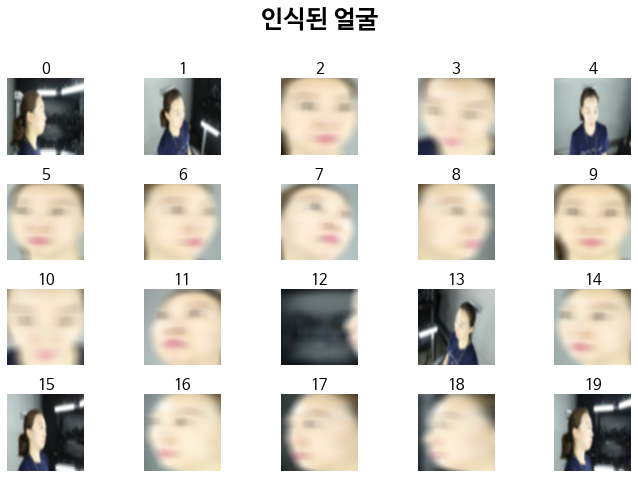

In [6]:
faces = []

index = 0
for face_dict in face_dicts:

  # 이미지 불러오기
  img_path = ROOT_DIR + image_name_list[index]
  image = cv2.imread(img_path)
  face = cv2.GaussianBlur(image, (11, 11), sigmaX=11, sigmaY=11)
  face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)

  # 얼굴 인식 실패한 이미지는 크기만 재조정
  if (face_dict == []):
    face = cv2.resize(face, dsize=(80, 80))
    faces.append(face)
    index+=1

  # 얼굴 인식 성공한 이미지는 얼굴 윤곽 박스값을 따옴
  else:
    x1, y1, width, height = face_dict[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    face = face[y1:y2, x1:x2]
    face = cv2.resize(face, (80,80), interpolation=cv2.INTER_AREA)    
    faces.append(face)
    index += 1

fig, ax = plt.subplots(4, 5, figsize=(10, 6))

index = 0
for i in range(4):
  for j in range(5):
    ax[i][j].set_title(f'{index}', fontsize=15)
    ax[i][j].imshow(faces[index])
    ax[i][j].axis('off')
    index+=1

fig.suptitle('인식된 얼굴', fontsize=25, fontweight='bold', y=1.1)
fig.tight_layout()

## 4) 얼굴 네모치기

Text(0.5, 0.98, '인식된 얼굴 네모 처리')

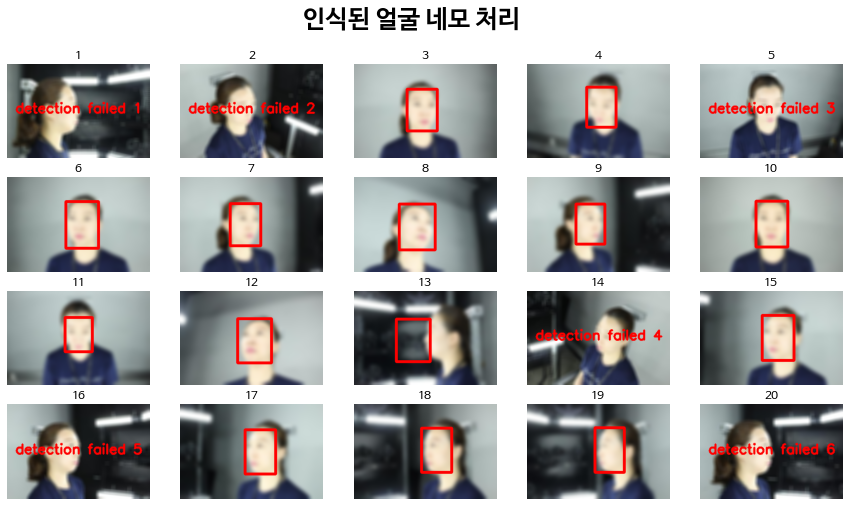

In [12]:
fig, ax = plt.subplots(4, 5, figsize=(15, 8))

count = 1
org = (20, 120)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1.1
color = (255, 0, 0)
thickness = 3
angle = 30

i = 0
for row in range(4):
  for column in range(5):  
    # 이미지 불러오기 및 전처리
    image = cv2.imread(ROOT_DIR + image_name_list[i])
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.GaussianBlur(image, (11, 11), sigmaX=11, sigmaY=11)
      
    # 얼굴 인식 실패한 이미지는 글로 표시
    if (face_dicts[i] == []):
      text = f"detection failed {count}"
      image = cv2.putText(image, text, org, font, fontScale, color, thickness)
      count += 1

    # 얼굴 인식 성공한 이미지는 네모 쳐 줌
    else: 
      x1, y1, width, height = face_dicts[i][0]['box']
      x2, y2 = x1 + width, y1 + height

      image = cv2.GaussianBlur(image, (11, 11), sigmaX=11, sigmaY=11)
      image = cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 5)

    ax[row][column].imshow(image)
    ax[row][column].axis('off')
    ax[row][column].set_title(i+1)
    i+=1

fig.suptitle("인식된 얼굴 네모 처리", fontsize=25, fontweight='bold')

5) Detect features

Text(0.5, 0.98, '이목구비 인식')

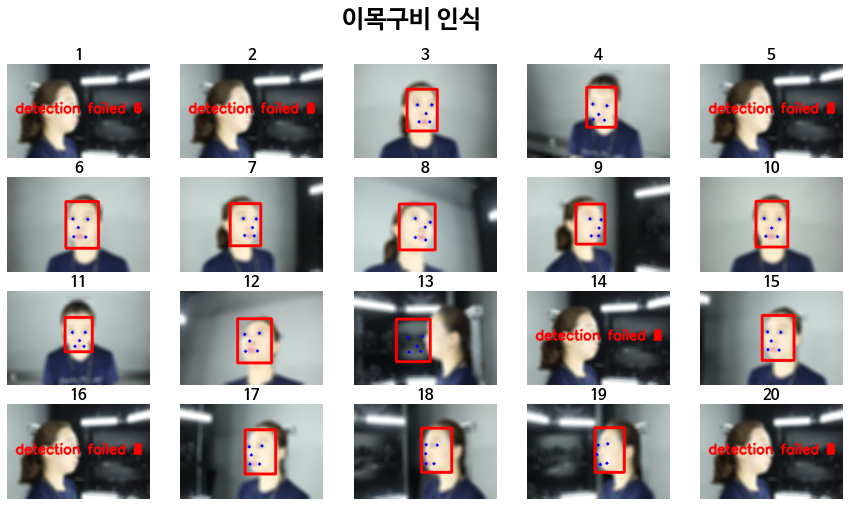

In [13]:
# circle parameters
radius = 2
thickness = 3
color = (0, 0, 255)
text_color = (255, 0, 0)

fig, ax = plt.subplots(4, 5, figsize=(15, 8))

count = 1
i = 0
for row in range(4):
  for column in range(5):
    face = cv2.imread(ROOT_DIR + image_name_list[i])
    face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
    face = cv2.GaussianBlur(face, (13, 13), sigmaX=11, sigmaY=11)
    
    if (face_dicts[i] == []):
      message = f"detection failed {count}"
      face = cv2.putText(image, message, org, font, fontScale, text_color, thickness)
      count+=1

    else:
      face_dict = face_dicts[i][0]
      box = face_dict['box']

      x1, y1, width, height = box
      x2, y2 = x1 + width, y1 + height

      face = cv2.rectangle(face, (x1, y1), (x2, y2), (255,0,0), 5)
      
      # 얼굴 특징(landmark) 추출
      keypoints = face_dict['keypoints']

      # 얼굴 특징에 동그라미 그려주기
      cv2.circle(face, keypoints['left_eye'], radius, color, thickness)
      cv2.circle(face, keypoints['right_eye'], radius, color, thickness)
      cv2.circle(face, keypoints['nose'], radius, color, thickness)
      cv2.circle(face, keypoints['mouth_left'], radius, color, thickness)
      cv2.circle(face, keypoints['mouth_right'], radius, color, thickness)

    ax[row][column].set_title(i+1, fontsize=15, fontweight='bold')
    ax[row][column].imshow(face)
    ax[row][column].axis('off')
    i+=1

fig.suptitle("이목구비 인식", fontsize=25, fontweight='bold')

# 오류 공책
```error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'```
  - 초기화 되지 않은 변수를 투입하면 생기는 오류 ```> cv2.cvtColor()```
- Can you try to print the img variable before passing to cv2.cvtColor() function
  - ```> print(img) or print(img.shape)``` 출력해 보면 투입 자료형이 이미지가 맞는지 확인할 수 있음. (by [rahul4data](https://stackoverflow.com/users/11021540/rahul4data))
- 이미지가 아닌 다른 자료형을 투입했을 가능성이 높음.
  - 오류 난 이유: jpg 폴더에 txt 파일이 섞여 있었음

https://stackoverflow.com/questions/53926657/215assertion-failed-src-empty-in-function-cvcvtcolor

- 한국어 설정(테디노트 참고)
  - ```!sudo apt-get install -y fonts-nanum```
  - ```!sudo fc-cache -fv```
  - ```!rm ~/.cache/matplotlib -rf```
    - ```import matplotlib.pyplot as plt```
    - ```plt.rc('font', family='NanumBarunGothic')```  
https://teddylee777.github.io/colab/colab-korean

- 이미지에 텍스트 추가
  - ```cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA, False)```